# Project 1: Counting words in college subreddits

Due 9/16. Reminder that you are allowed to use any amount of AI assistance or outside resources with citation

## Part 1: word counting and bag of words

In [1]:
#install spacy in the current conda environment
!pip install spacy



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#download a small language model to help with cleaning tasks
!python -m spacy download en_core_web_sm



     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --- ------------------------------------ 1.0/12.8 MB 7.2 MB/s eta 0:00:02
     -------- ------------------------------- 2.6/12.8 MB 7.6 MB/s eta 0:00:02
     ------------- -------------------------- 4.2/12.8 MB 7.2 MB/s eta 0:00:02
     ------------------ --------------------- 5.8/12.8 MB 7.2 MB/s eta 0:00:01
     ---------------------- ----------------- 7.3/12.8 MB 7.4 MB/s eta 0:00:01
     --------------------------- ------------ 8.9/12.8 MB 7.3 MB/s eta 0:00:01
     -------------------------------- ------- 10.5/12.8 MB 7.4 MB/s eta 0:00:01
     -------------------------------------- - 12.3/12.8 MB 7.6 MB/s eta 0:00:01
     ---------------------------------------- 12.8/12.8 MB 7.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [2]:
#import required libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import spacy
language_model = spacy.load("en_core_web_sm")
import matplotlib.pyplot as plt

import numpy as np

### Problem 1 and example: common words in the Michigan subreddit

In [3]:
#read the data from a csv file in the folder
mich=pd.read_csv("umich.csv")

In [4]:
#jupyter will print a pretty representation of most python objects if you just put the name
#we can see that the full text of each reddit comment is provided in the "text" column
mich

,Unnamed: 0,date,post_votes,text,user,com_votes
0,0,2024-09-04 15:33:20,2,"Zingermans has a nice reuben, pretty pricey bu...",Suspicious-Bad703,2
1,1,2024-09-04 15:33:20,2,I really love Tomokun!,webstbre000,2
2,2,2024-09-04 15:33:20,2,The Seoul is pretty good I especially like the...,iaxlmao,1
3,3,2024-09-04 15:33:20,2,A lot of it depends on what type of food and w...,I-696,1
4,4,2024-09-04 14:32:17,1,You can book completely enclosed private study...,sneep_,2
...,...,...,...,...,...,...
8334,8334,2024-07-02 12:35:36,9,It isn’t a student org,Vibes_And_Smiles,1
8335,8335,2024-07-02 11:07:10,0,Life \r\nMatter \r\nLife's matter,tctu,8
8336,8336,2024-07-02 11:07:10,0,google,SUPERazkari,4
8337,8337,2024-07-02 11:07:10,0,That’s a hard question to answer for a set of ...,Own-Resident-3837,-1


In [5]:
#this is a function that does some light cleaning, by removing newline characters, converting to lowercase, and removing punctuation

def clean(text):
    #remove newline and space characters
    text = ' '.join(text.split())
    #convert the text to lowercase
    text = text.lower()
    #remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

In [6]:
#pandas allows us to quickly apply this cleaning function to all rows in a column
mich['cleaned_text'] = mich['text'].apply(clean)

In [7]:
#we can see the first comment after cleaning vs before
mich["cleaned_text"][0]

'zingermans has a nice reuben pretty pricey but the sammies are pretty big'

In [8]:
mich["text"][0]

'Zingermans has a nice reuben, pretty pricey but the sammies are pretty big'

In [9]:
#create a bag of words representation with count vectorizer
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(mich['cleaned_text'])

In [10]:
#this is a sparse matrix, which is a more efficient way to store a matrix with many zeros
#the matrix has 8339 rows (one for each comment) and 15289 columns (one for each unique word in the dataset)
bag_of_words

<8339x15289 sparse matrix of type '<class 'numpy.int64'>'
	with 221217 stored elements in Compressed Sparse Row format>

In [11]:
#create a dataframe from the sparse matrix
#this is a more human-readable way to view the data
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
bow_df

,aa,aadl,aapd,aata,ab,abab,abandon,abandoned,abbreviation,abbreviations,...,zoned,zones,zoning,zoo,zoom,zoomer,zoomers,zuckerberg,𝓲𝓷𝓼𝓮𝓬𝓾𝓻𝓮,𝘢𝘩𝘦𝘮
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8334,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8335,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8337,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#dataframes have a convenient method for summing the values in each column
#this will give us the number of times each word appears in the dataset
word_counts = bow_df.sum()
#we can sort the values to see the most common words
word_counts = word_counts.sort_values(ascending=False)

#notice that the top words are not very informative, as they are common words that appear in many contexts
#and bottom words include a lot of typos and other noise
word_counts

the            11306
to              8480
and             6921
you             6256
of              5028
               ...  
journals           1
journeywhen        1
jpg                1
js                 1
𝘢𝘩𝘦𝘮               1
Length: 15289, dtype: int64

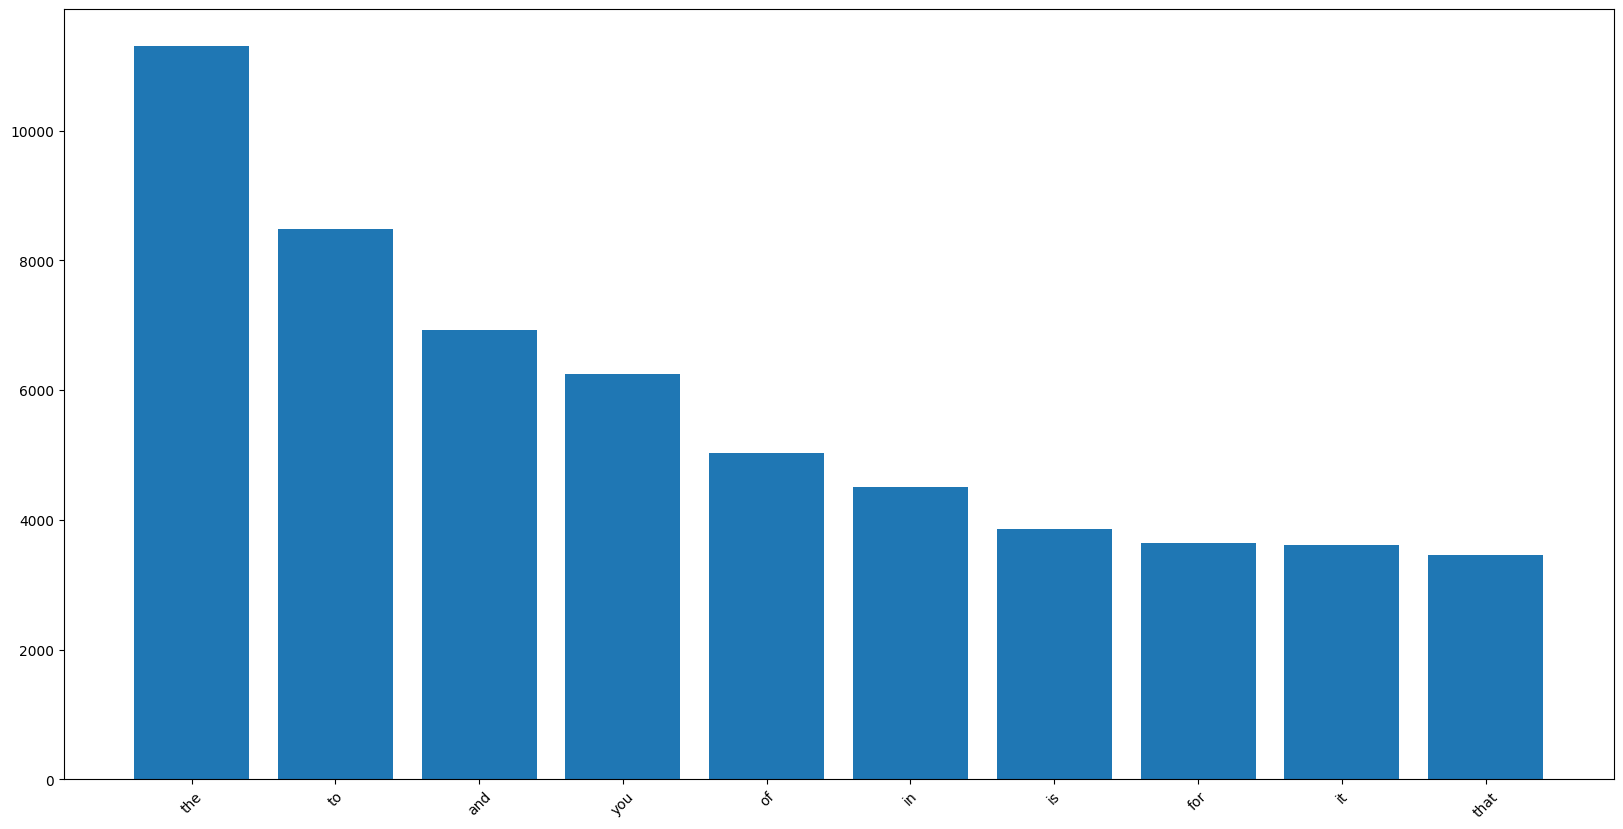

In [13]:
#we can plot the most common words
#we will only plot the top 10 words for readability
word_counts = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(word_counts.index, word_counts.values)
plt.xticks(rotation=45)
plt.show()

#### Question 1: what do you notice about the words in this plot? Is this useful for studying the community?

The use of Articles and pronouns being the most frequent just means that the people in the community used them the most. Sectioning the words out like this might help in certain scenerios but it may not be useful enough to understand the dynamics within the community.  

#### Lemmatization and stopword removal

In [14]:
#lemmatization function from the openclassrooms reading
def lemmatize(text):

   doc = language_model(text)

   tokens = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]

   return ' '.join(tokens)

In [15]:
#we can further process the text by removing stopwords and lemmatizing
mich['lemmatized_text'] = mich['cleaned_text'].apply(lemmatize)

In [16]:
#count vectorizer also has parameters min_df and max_df that can be used to filter out words that are too rare or too common
#min_df=3 means that a word must appear in at least 3 documents to be included, this will remove typos and rare words
#max_df=0.3 means that a word must appear in at most 30% of documents to be included, this will remove corpus-specific stopwords

#we are also able to include n-grams in the count vectorizer
#n-grams are sequences of n words that appear together in the text
#the n-gram_range parameter specifies the minimum and maximum n-gram size to include (so in this case, we are including both unigrams and bigrams)

vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
bag_of_words = vectorizer.fit_transform(mich['lemmatized_text'])

In [17]:
#we can see that we filtered out 11000 common words and typos
bag_of_words

<8339x8608 sparse matrix of type '<class 'numpy.int64'>'
	with 126768 stored elements in Compressed Sparse Row format>

In [18]:
#we can repeat the previous code to create a dataframe and count the words
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
word_counts = bow_df.sum()
word_counts = word_counts.sort_values(ascending=False)
word_counts

not              2863
student          1183
like             1183
people           1124
class             988
                 ... 
club campus         3
open not            3
open source         3
club activity       3
luck search         3
Length: 8608, dtype: int64

In [19]:
#we can convert this to a percentage instead of an absolute count by dividing by the total number of words
word_counts = word_counts / word_counts.sum()
word_counts

not              0.019755
student          0.008163
like             0.008163
people           0.007756
class            0.006817
                   ...   
club campus      0.000021
open not         0.000021
open source      0.000021
club activity    0.000021
luck search      0.000021
Length: 8608, dtype: float64

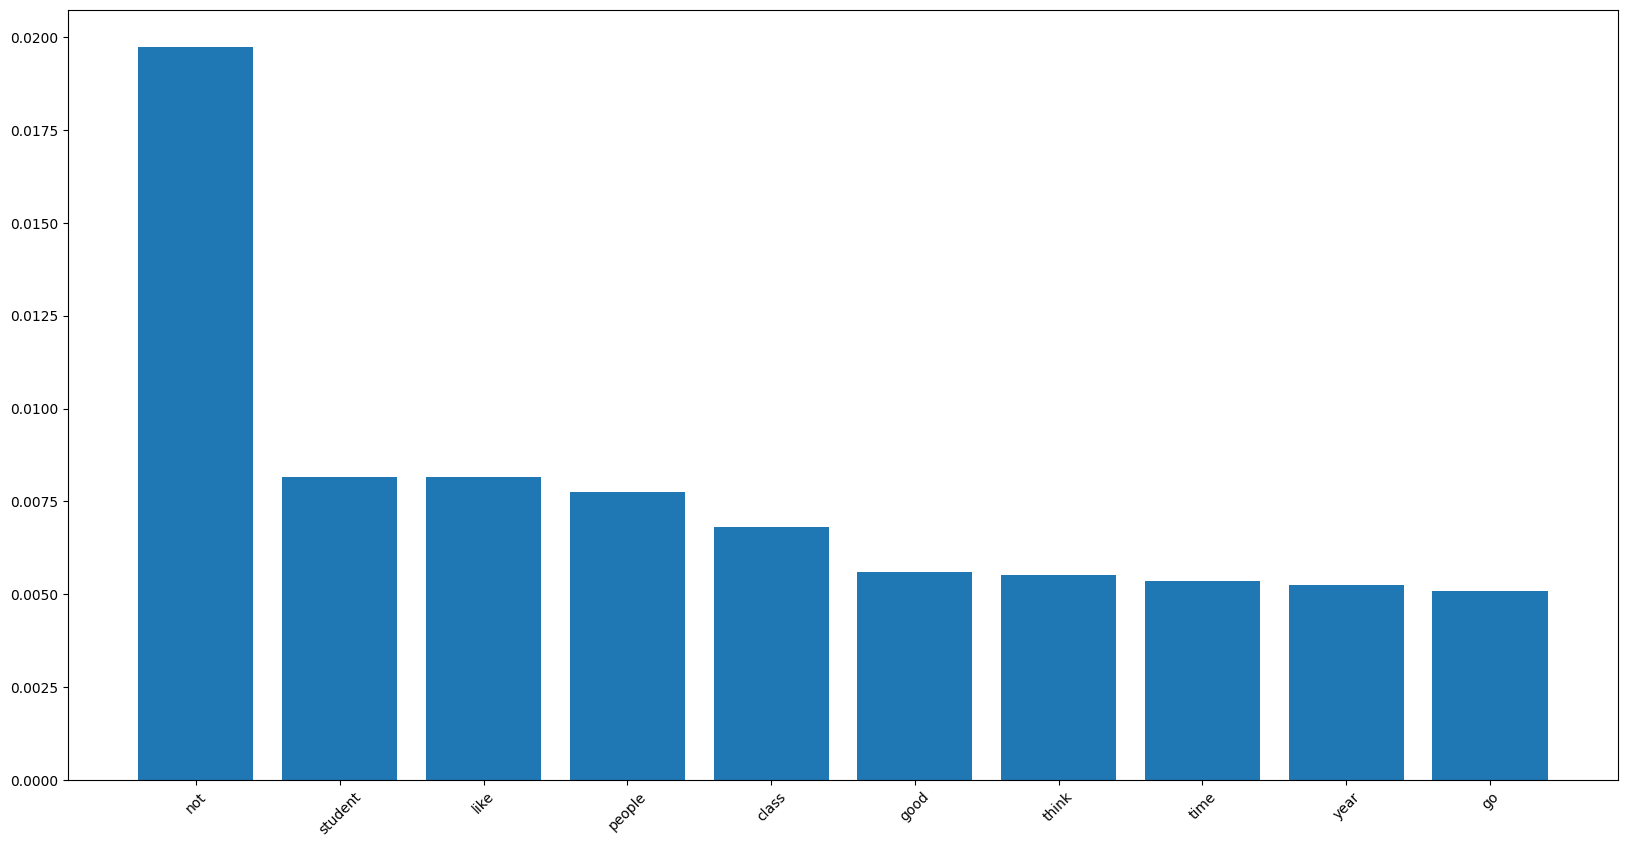

In [20]:
#we can plot the most common words
#we will only plot the top 10 words for readability
plot_list = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

In [21]:
#pandas allows us to access specific words in the series using the index
word_counts["student loan"]

4.1400153180566765e-05

In [22]:
#we can also use a list of words to compare and plot specific words
plot_list=word_counts[["history", "business", "computer science", "cs", "computer"]]
plot_list

history             0.000352
business            0.000600
computer science    0.000035
cs                  0.001228
computer            0.000262
dtype: float64

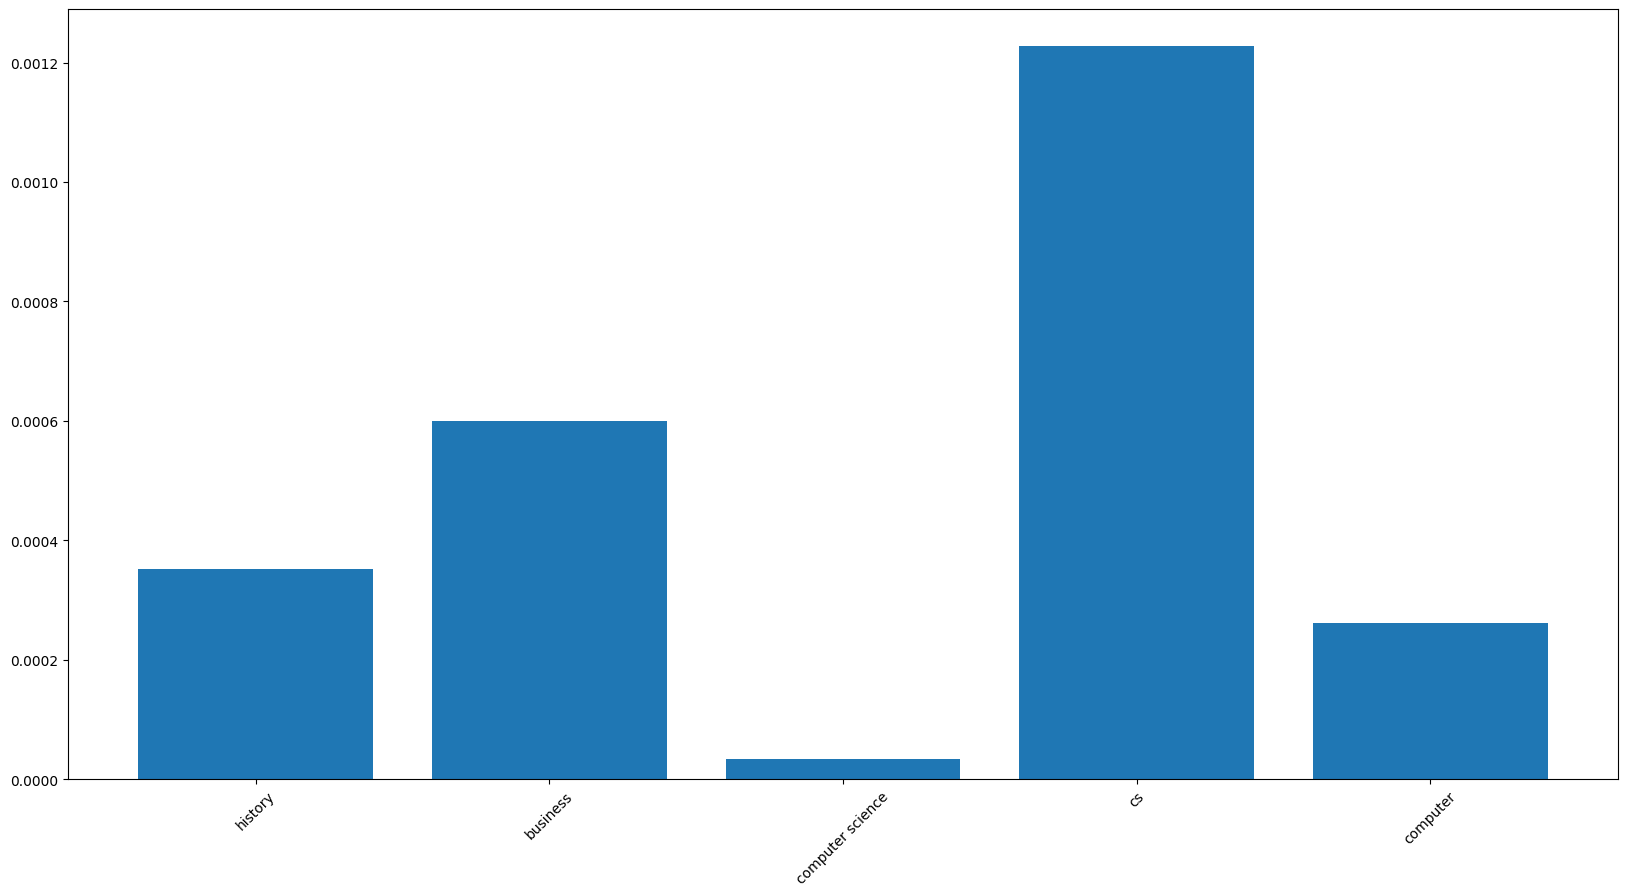

In [23]:

plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

#### Question 2:

In [24]:
#TODO: pick 5 words that you find interesting or are curious about, and plot a bar plot of their frequency in this dataset 

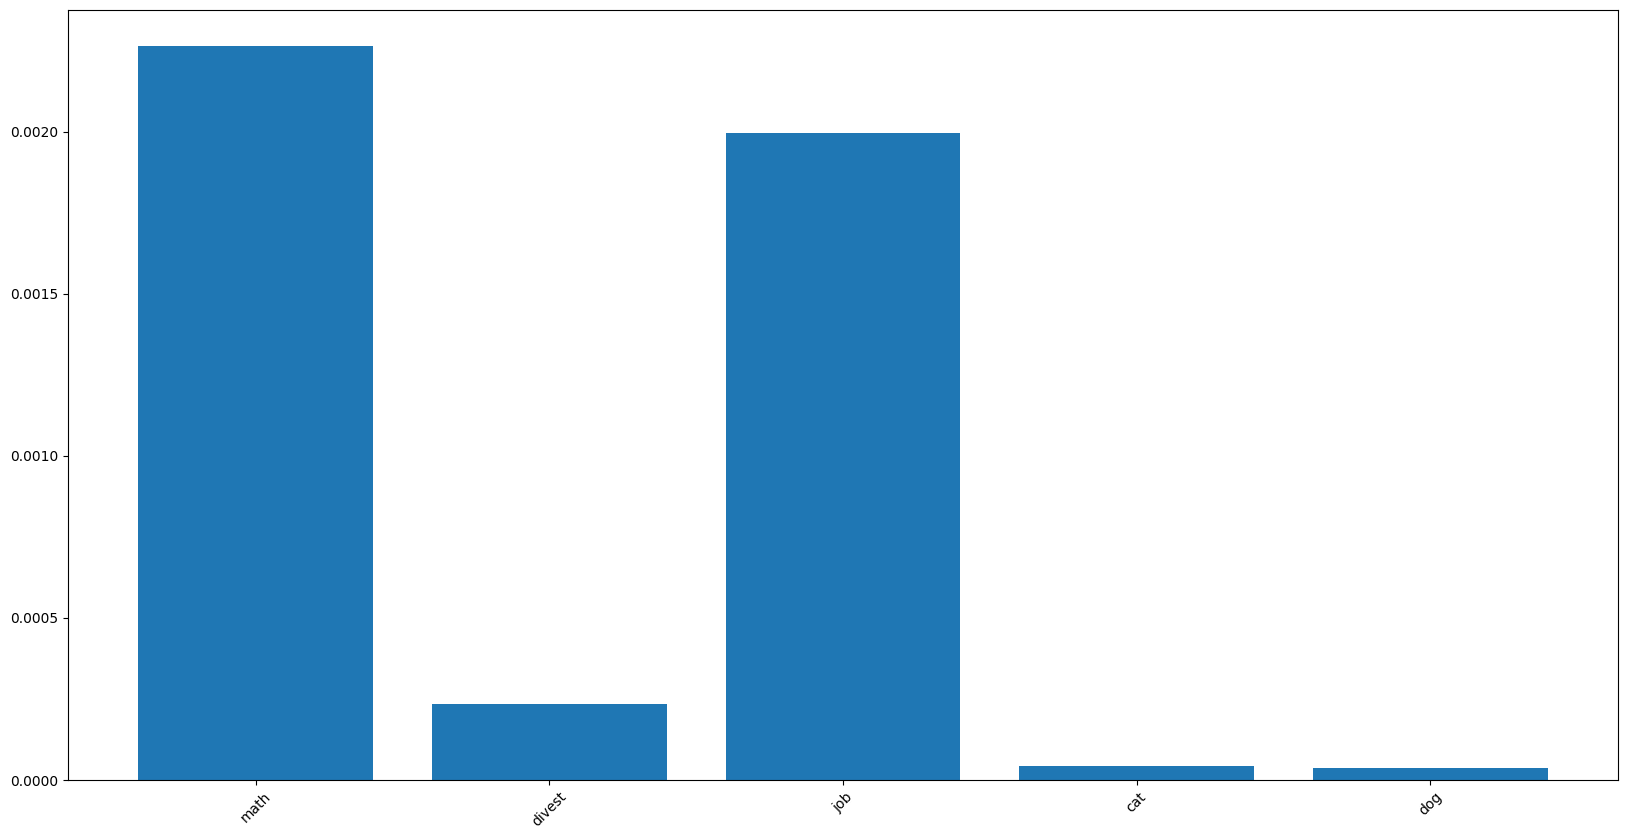

In [35]:
plot_list=word_counts[["math", "divest", "job", "cat", "dog"]]
plot_list
plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

### Problem 2: repeat this process with the Illinois subreddit data (in this directory as "uiuc.csv"). You should not have to change too much in the previous code besides the dataframe path and name. Your notebook should include the two bar graphs including and excluding stopwords. Use the same 5 words and compare their relative frequency between the two subreddits. Discuss any interesting differences you notice in a short markdown cell. 

In [25]:
uiuc=pd.read_csv("uiuc.csv") 
uiuc['cleaned'] = uiuc['text'].apply(clean)
uiuc['cleaned_text'] = uiuc['text'].apply(clean)

In [26]:
uiuc['cleaned_text'][0]

'have the same professor and in lecture he did say we were gonna have to learn some of the stuff ourself i would recommend using online resources such as pauls online math notes and professor leonard on youtube personally ive been learning the material from those sources before going to lecture'

In [27]:
uiuc['text'][0]

'Have the same professor! And in lecture he did say we were gonna have to learn some of the stuff ourself\xa0\r\n\r\nI would recommend using online resources such as Paul’s Online Math Notes and Professor Leonard on YouTube. Personally, I’ve been learning the material from those sources before going to lecture'

In [28]:
vectorize = CountVectorizer()
bag_of_words = vectorize.fit_transform(uiuc['cleaned_text'])
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorize.get_feature_names_out())
bow_df

,aa,aaa,aaaaah,aaabb,ab,abandoned,abcc,abide,abilities,ability,...,zombie,zone,zones,zoo,zoom,zoomed,봉사를,세계로,숭실,진리와
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4720,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4721,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4722,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4723,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
word_counts = bow_df.sum()
word_counts = word_counts.sort_values(ascending=False)
word_counts = word_counts.head(10)
word_counts

the     4613
to      3629
and     2973
you     2551
of      1854
in      1794
is      1646
it      1530
for     1488
that    1397
dtype: int64

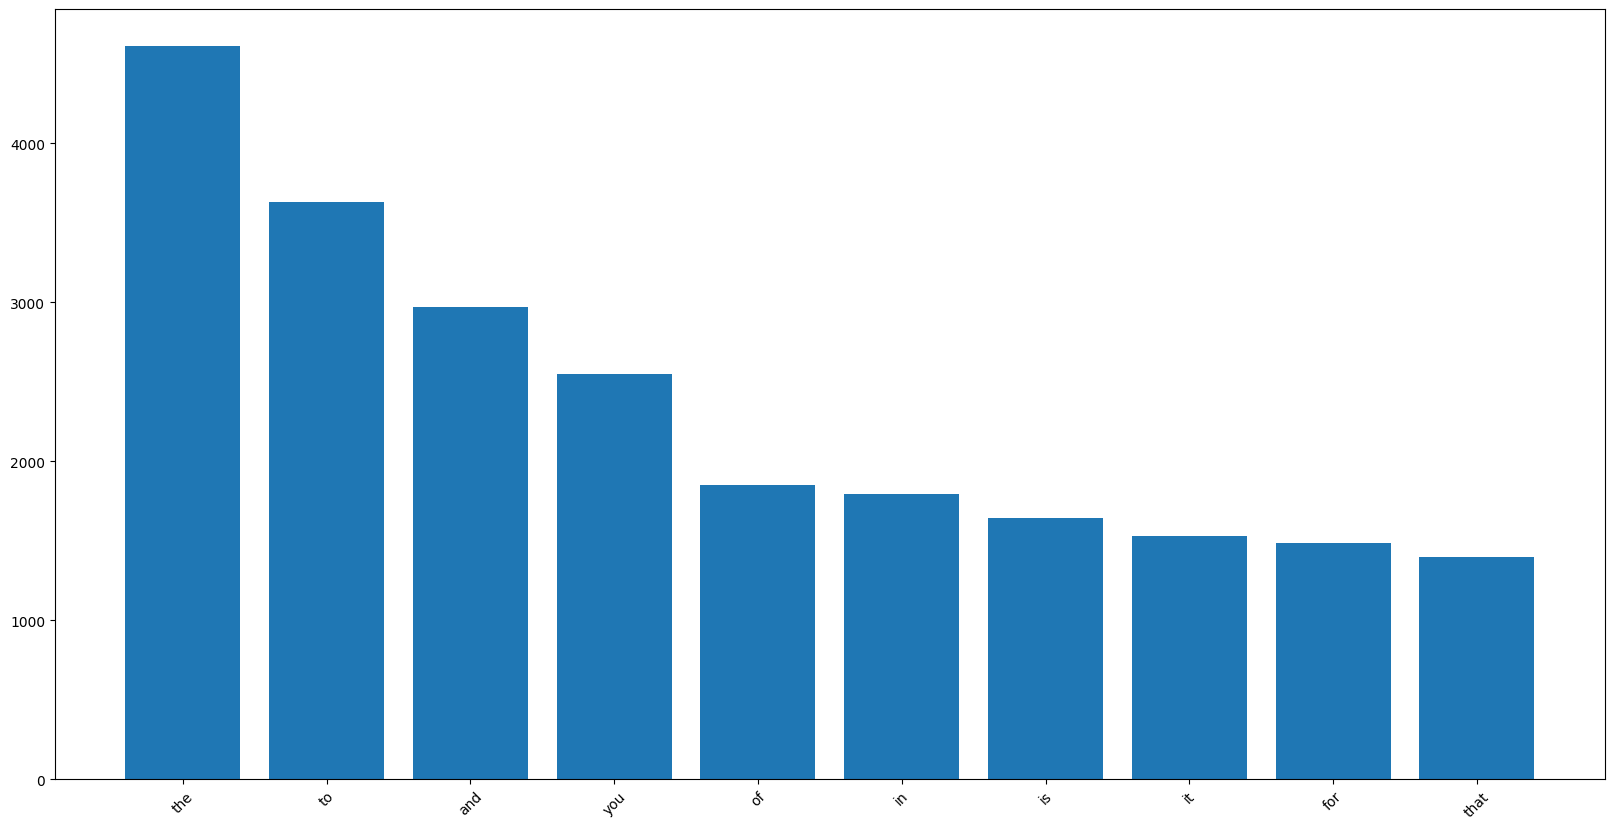

In [30]:
plt.figure(figsize=(20,10))
plt.bar(word_counts.index, word_counts.values)
plt.xticks(rotation=45)
plt.show()


In [31]:
uiuc['lemmatized_text'] = uiuc['cleaned_text'].apply(lemmatize)

In [32]:
vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
bag_of_words = vectorizer.fit_transform(uiuc['lemmatized_text'])


In [33]:
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
word_counts = bow_df.sum()
word_counts = word_counts.sort_values(ascending=False)
word_counts

not          1205
like          534
people        481
good          389
time          376
             ... 
mask sick       3
marville        3
markdown        3
maps            3
luckily         3
Length: 3882, dtype: int64

In [34]:
word_counts = word_counts / word_counts.sum()
word_counts

not          0.021826
like         0.009672
people       0.008712
good         0.007046
time         0.006810
               ...   
mask sick    0.000054
marville     0.000054
markdown     0.000054
maps         0.000054
luckily      0.000054
Length: 3882, dtype: float64

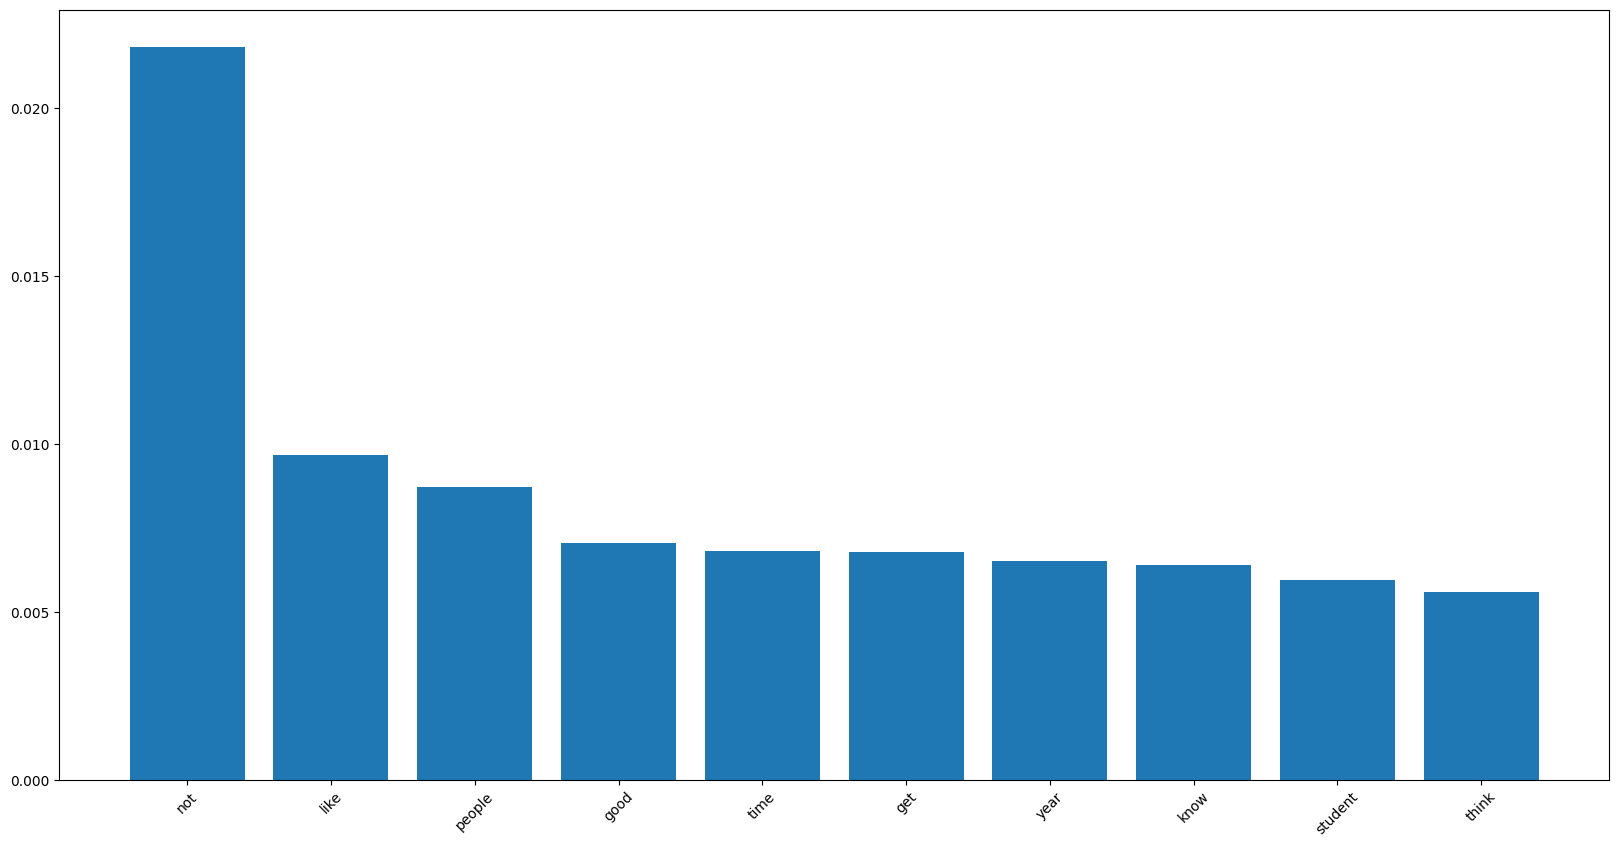

In [35]:
plot_list = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

In [36]:
plot_list=word_counts[["history", "business", "computer science", "cs", "computer"]]
plot_list


history             0.000344
business            0.000543
computer science    0.000054
cs                  0.001413
computer            0.000290
dtype: float64

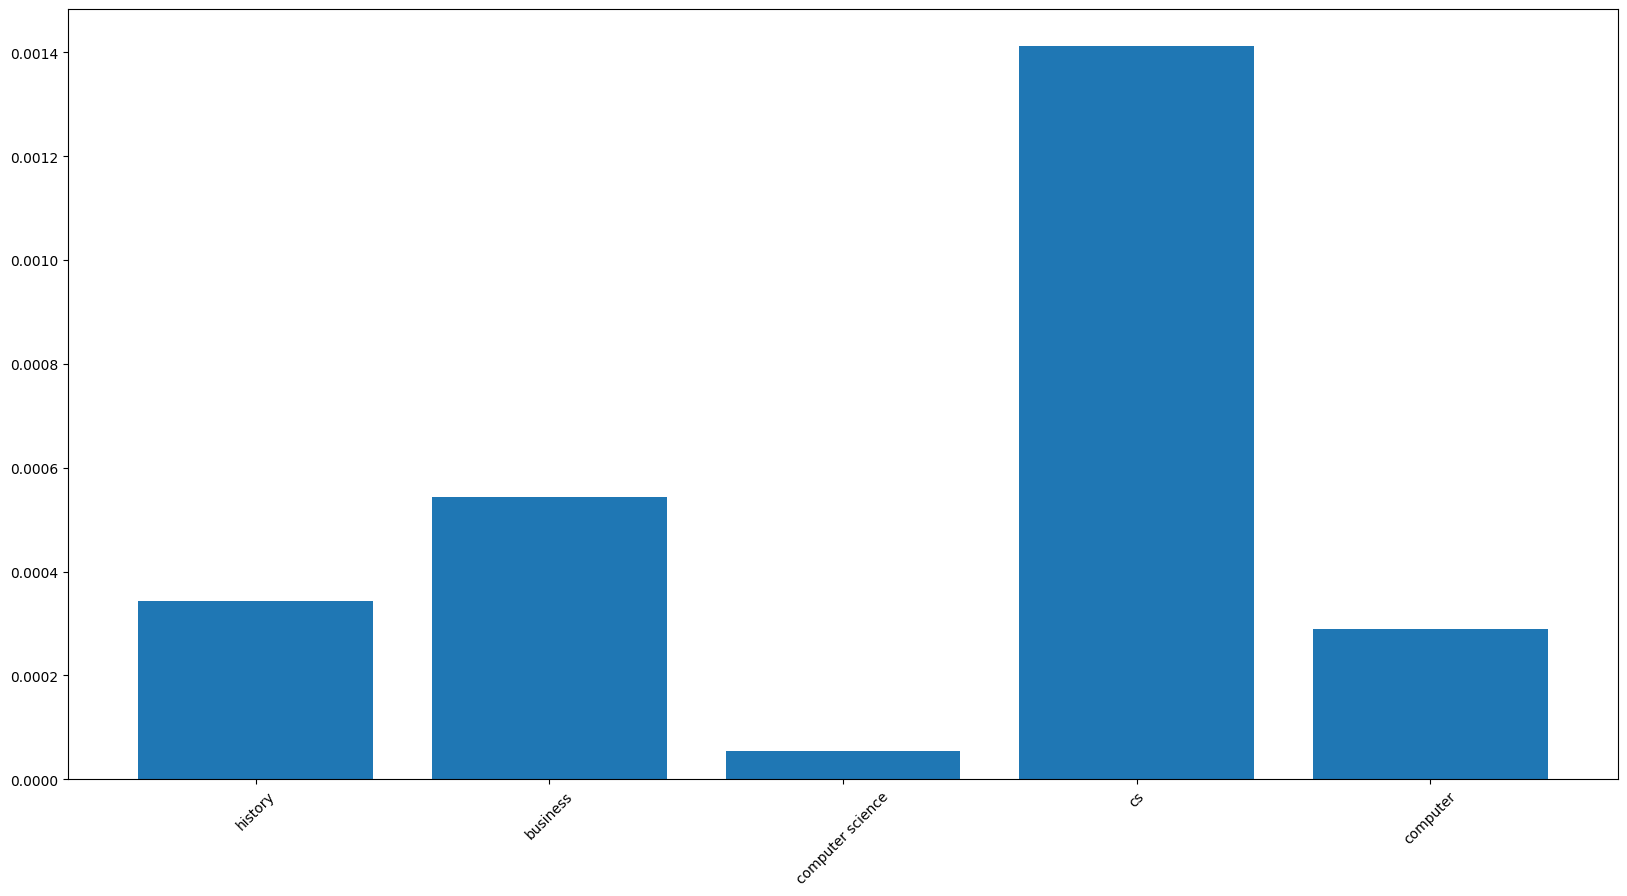

In [37]:
plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

In [65]:
"The two graphs between UIUC and MICHIGAN subreddits make sense. Both schools have a competitative cs program and these graphs show some correlation with that fact."

'The two grpahs between UIUC and MICHIGAN subreddits make sense. Both schools have a competitative cs program and these graphs show some correlation with that fact.'

### Problem 3: using the provided combined dataframe, train a logistic regression model using the sklearn Logistic Regression implementation. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html. Create a bag of words table from the combined data, and use that along with the "label" column to train the classifier. Please try this out and be prepared with issues or questions next Monday. We will be discussing in class

In [111]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.8 MB 4.2 MB/s eta 0:00:03
   --- ------------------------------------ 0.8/9.8 MB 4.2 MB/s eta 0:00:03
   ---- ----------------------------------- 1.0/9.8 MB 1.6 MB/s eta 0:00:06
   ------ --------------------------------- 1.6/9.8 MB 2.0 MB/s eta 0:00:05
   ------- -------------------------------- 1.8/9.8 MB 1.9 MB/s eta 0:00:05
   ----------- ---------------------------- 2.9/9.8 MB 2.4 MB/s eta 0:00:03
   ---------------- ----------------------- 3.9/9.8 MB 2.8 MB/s eta 0:00:03
   ------------------- -------------------- 4.7/9.8 MB 3.0 MB/s eta 0:00:02
   ----------------------- ---------------- 5.8/9.8 MB 3.2 MB/s eta 0:00:02
   ---------------------------- ----------- 7.1/9.8 MB 3.5 MB/s eta 0:00:01
   ---------------------------------- ----- 8.4/9.8 MB 3.8 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 4.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import statsmodels.api as smf
import pandas as pd

In [39]:
uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])

In [40]:
#clean and lemmatize the data csv
data['cleaned_text'] = data['text'].apply(clean)
data['lemmatized_text'] = data['cleaned_text'].apply(lemmatize)


In [41]:
#create a bag of words representation with count vectorizer
vectorize = CountVectorizer()
bag_of_words = vectorize.fit_transform(data['cleaned_text'])

In [42]:
X = bag_of_words
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [43]:
#train a logistic regression model using the bag of words features as X and the label column as y
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)



LogisticRegression(max_iter=1000)

In [44]:
#report the accuracy of the model
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_accuracy


0.9305771130238465

#### Part 2: hold out part of the dataset using sklearn train_test_split (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Pass in your previously generated bag of words as X and the label column as y. Use only the X_train and y_train for training and hold out the X_test and y_test to score the model on unseen data.

In [45]:
# what is the accuracy of the model? Is it better or worse than previous?Why do you think it has changed? 
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_accuracy

print("The training data was 93% and the test data was 69%")
print("It is worse than before")
print("I think it was worse because the train data may have not reflected some key details that was in the test data.")

The training data was 93% and the test data was 69%
It is worse than before
I think it was worse because the train data may have not reflected some key details that was in the test data.


#### Part 3: Examine the top features of your model using the following code

In [ ]:
#get the coefficients of the model and plot the top 10 most positive and top 10 most negative coefficients
#what do you notice about these words? Are they surprising or expected

They were expected beacause of the word Illinois will have the top coefficient score if the school is UIUC. 

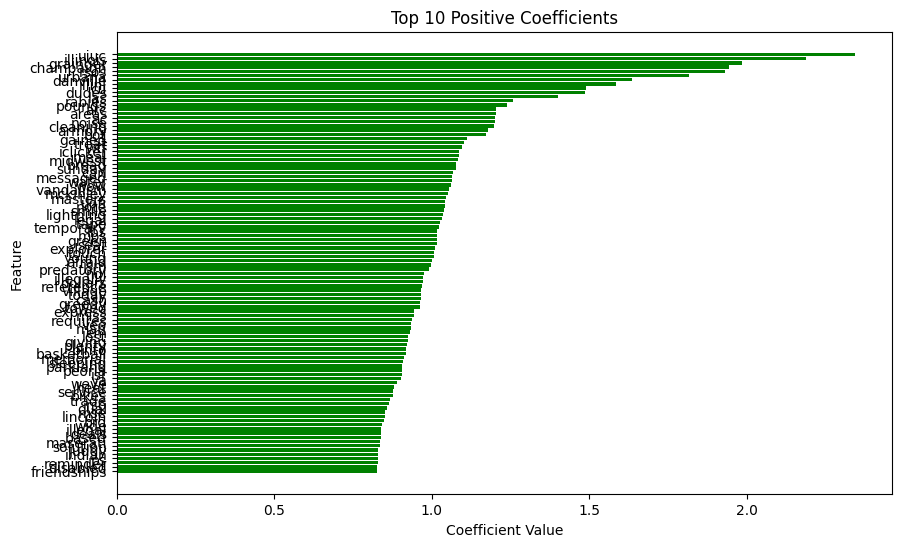

In [46]:
feature_names = vectorize.get_feature_names_out()
coefficients = pd.DataFrame({'feature': feature_names, 'coefficient': model.coef_[0]})
coefficients = coefficients.sort_values('coefficient', ascending=False)
top_10_positive = coefficients.head(100)
top_10_negative = coefficients.tail(100)
top_10_positive, top_10_negative

plt.figure(figsize=(10, 6))
plt.barh(top_10_positive['feature'], top_10_positive['coefficient'], color='g')
plt.title('Top 10 Positive Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  # Invert y-axis to display top features at the top
plt.show()

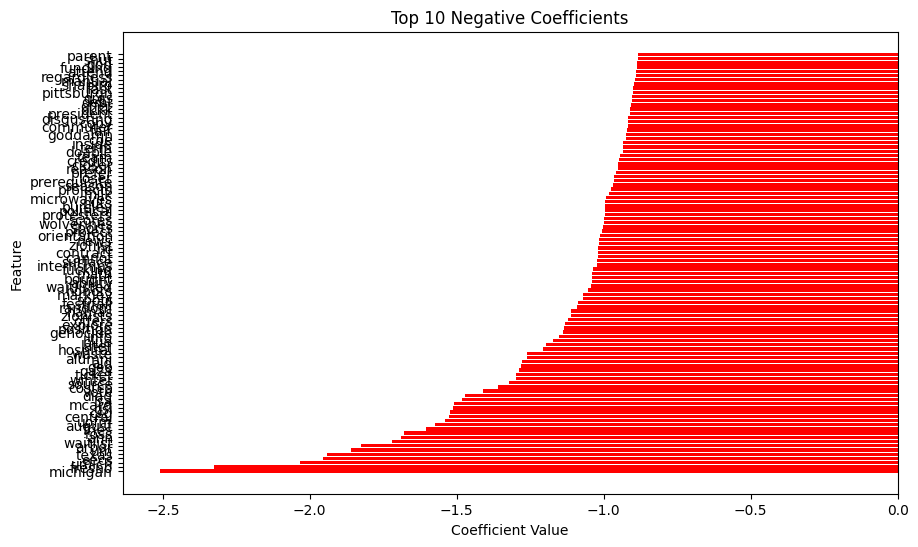

In [47]:
plt.figure(figsize=(10, 6))
plt.barh(top_10_negative['feature'], top_10_negative['coefficient'], color='r')
plt.title('Top 10 Negative Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  # Invert y-axis to display top features at the top
plt.show()

In [ ]:
#examine these words and see if they make sense. Do they differentiate UIUC from another university?
Yes because more references pertaiing to the university will be stated less in other university subreddits. 

### Problem 4: Train a 10 topic topic model from the UIUC subreddit data using Gensim LDA. (https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html) If you get here before Wednesday 9/11, don't rush to finish, but feel free to continue ahead. We will go through this in class. Print out the top words in each topic, and read through the words for each topic to decide the theme of the topic: remember this is subjective and there are no right or wrong answers. Print out a few comments with high frequencies of each topic and analyze if your topic labels were representative. 

In [177]:
!pip install gensim




[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [178]:
!pip install --upgrade gensim


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [179]:
!pip install nltk


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import gensim
import pandas as pd
from gensim import corpora
import nltk
from nltk.corpus import stopwords
import string 
import numpy as np

In [11]:
nltk.download('stopwords')

uiuc = pd.read_csv("uiuc.csv")

stop_words = set(stopwords.words('english')) 

def preprocess(text): 
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))

    tokens = text.split()

    return [word for word in tokens if word not in stop_words]

uiuc['tokens'] = uiuc['text'].apply(preprocess)

dictionary = corpora.Dictionary(uiuc['tokens'])

dictionary.filter_extremes(no_below=5, no_above=.5)

corpus = [dictionary.doc2bow(tokens) for tokens in uiuc['tokens']]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eagle\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
lda_model = gensim.models.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=10)

In [13]:
for topic_id in range(10):
    top_words = lda_model.show_topic(topic_id, topn=10)
    print(f"Topic {topic_id}: {[word for word, _ in top_words]}")

Topic 0: ['yes', 'students', 'got', 'get', 'help', 'student', 'contact', 'that’s', 'it’s', 'career']
Topic 1: ['like', 'also', 'make', 'state', 'sure', 'need', 'one', 'another', 'know', 'see']
Topic 2: ['get', 'apartment', 'hours', 'cleaning', 'year', 'like', 'still', 'drink', 'back', 'lease']
Topic 3: ['water', 'im', 'thank', 'safe', 'post', 'youre', 'it’s', 'like', 'still', 'one']
Topic 4: ['im', 'bad', 'like', 'think', 'students', 'cs', 'also', 'lot', 'good', 'well']
Topic 5: ['people', 'friends', 'i’m', 'time', 'like', 'make', 'it’s', 'feel', 'don’t', 'go']
Topic 6: ['class', 'like', 'students', 'know', 'say', 'years', 'dont', 'one', 'get', 'things']
Topic 7: ['thanks', 'good', 'lol', 'would', 'take', 'know', 'lmao', 'also', 'money', 'i’ll']
Topic 8: ['campus', 'get', 'would', 'car', 'bike', 'could', 'bus', 'university', 'back', 'parking']
Topic 9: ['go', 'weather', 'campus', 'get', 'hall', 'day', 'many', 'check', 'also', 'app']


In [16]:
def get_dominant_topic(doc_bow):
    topic_probs = lda_model.get_document_topics(doc_bow)
    dominant_topic = max(topic_probs, key=lambda x: x[1])[0]
    return dominant_topic

uiuc['dominant_topic'] = uiuc['tokens'].apply(lambda tokens: get_dominant_topic(dictionary.doc2bow(tokens)))

for topic_id in range(10):
    print(f"\nComments for Topic {topic_id}:")
    comments = uiuc[uiuc['dominant_topic'] == topic_id]['text'].head(3)
    for comment in comments:
        print(f"- {comment}")


Comments for Topic 0:
- bookstor
- I did , now I’am living in luxury penthouse in 309 green
- 😂🤣😂

Comments for Topic 1:
- I used to have the same problem. You just have to make sure that you installed the configuration on your device. If that wouldn't work, register it.
- On the bright side, no shadow ban
- Fed 


(although it's not like they would need to do any undercover work to figure this shit out lol)

Comments for Topic 2:
- Ayo what happened at Grainger?
- It almost happened, but I ran. That driver really seemed intent on hitting me. A distracted pedestrian would def have been hit.
- Yeah I recognize that and won't hold anything against them, it's just a little draining having multiple of these encounters in not even half a month alongside me being frustrated with my info being entered wrong which has affected a bunch of other things negatively. Hopefully it gets less shitty for all of us soon.

Comments for Topic 3:
- Hey man, the humanities buildies dont have their rooftop 